In [87]:
import ase.io as aio
from ase.visualize import view
from ase import Atoms

from pyscf import gto, dft

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm

import numpy as np

from matplotlib import pyplot as plt

# unconstraint energies

In [7]:
# nicotinamide_base = aio.read('/data/sahre/projects/atomic-energies/data/nicotinamide/base_structure.xyz')

In [8]:
view(nicotinamide_base)

<Popen: returncode: None args: ['/home/sahre/opt/miniconda3/envs/qm-tools/bi...>

In [3]:
# nicam_energies = []

# for dihe in np.linspace(0, 360, 37)[:-1]:
#     mol_tmp = nicotinamide_base.copy()
#     mol_tmp.set_dihedral(1,2,6,8, dihe, indices=[7,8,13,14])
# #     mol_tmp.get_dihedral(1,2,6,8)
#     aio.write(f'/data/sahre/projects/atomic-energies/data/nicotinamide/dihe_{dihe}.xyz', mol_tmp)

In [55]:
from natsort import natsorted
import glob

In [8]:
with open(f'/data/sahre/projects/atomic-energies/data/nicotinamide/dihe_structures', 'r') as f:
    lines = f.readlines()
lines = natsorted(lines)
with open(f'/data/sahre/projects/atomic-energies/data/nicotinamide/dihe_structures', 'w') as f:
    lines = f.writelines(lines)

## UFF

In [88]:
energy = []
with open(f'/data/sahre/projects/atomic-energies/data/nicotinamide/energies_UFF', 'r') as f:
    for line in f:
        energy.append(float(line.split()[-2]))

Text(0, 0.5, '$E$ (kJ/mol)')

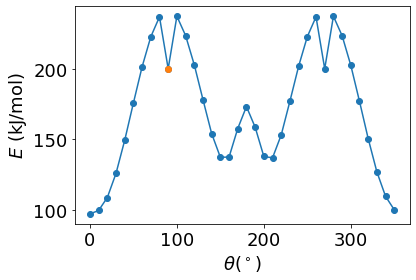

In [90]:
plt.plot(np.linspace(0, 360, 37)[:-1], energy, '-o')
plt.plot(np.linspace(0, 360, 37)[9], energy[9], 'o')
plt.xlabel(r'$\theta (^\circ)$')
plt.ylabel(r'$E$ (kJ/mol)')

In [18]:
np.linspace(0, 360, 37)[9]

90.0

## PBE def2-tzvp

Text(0, 0.5, '$E$ shifted (kJ/mol)')

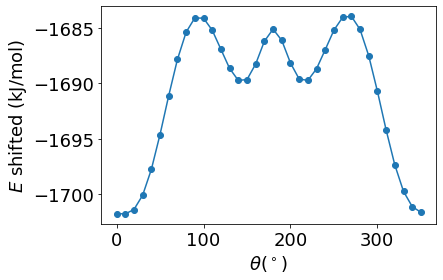

In [97]:
pbe_energies = np.load('/data/sahre/projects/atomic-energies/data/nicotinamide/pbe_energies.npy')
plt.plot(np.linspace(0, 360, 37)[:-1], (pbe_energies[:,0]+416)*2600, '-o')

plt.xlabel(r'$\theta (^\circ)$')
plt.ylabel(r'$E$ shifted (kJ/mol)')

In [98]:
np.amax(pbe_energies[:,0])-np.amin(pbe_energies[:,0])

0.006863732365843589

In [94]:
pbe_energies

array([[-416.65452207, -823.76048659,  407.10596452],
       [-416.65453223, -823.71241548,  407.05788325],
       [-416.65437969, -823.57382693,  406.91944724],
       [-416.65388506, -823.36595486,  406.7120698 ],
       [-416.65298973, -823.11844168,  406.46545194],
       [-416.65177653, -822.86366211,  406.21188558],
       [-416.65042542, -822.6322386 ,  405.98181318],
       [-416.64917017, -822.45009225,  405.80092208],
       [-416.64822204, -822.33670649,  405.68848444],
       [-416.64772797, -822.30425789,  405.65652993],
       [-416.64773499, -822.35722071,  405.70948571],
       [-416.64815173, -822.49218932,  405.84403759],
       [-416.64881572, -822.69792709,  406.04911137],
       [-416.64947907, -822.95550528,  406.30602621],
       [-416.64989661, -823.23891333,  406.58901672],
       [-416.64986767, -823.51631658,  406.86644891],
       [-416.64932616, -823.75251817,  407.10319201],
       [-416.64853765, -823.91340216,  407.26486451],
       [-416.6481156 , -823.

# Constraint optimization UFF

In [18]:
from openbabel import openbabel as ob

In [71]:
# with open('/data/sahre/projects/atomic-energies/data/nicotinamide/constraint_opt_UFF/dihe_structures', 'r') as f:
#     structure_files = f.readlines()
#     structure_files = natsorted(structure_files)
# with open('/data/sahre/projects/atomic-energies/data/nicotinamide/constraint_opt_UFF/dihe_structures', 'w') as f:
#     f.writelines(structure_files)

In [51]:
structure_files = []
with open('/data/sahre/projects/atomic-energies/data/nicotinamide/dihe_structures', 'r') as f:
    for line in f:
        structure_files.append(line.strip('\n'))

In [52]:
for f in structure_files:
    # Standard openbabel molecule load
    conv = ob.OBConversion()
    conv.SetInAndOutFormats('xyz','xyz')
    mol = ob.OBMol()
    conv.ReadFile(mol, f'/data/sahre/projects/atomic-energies/data/nicotinamide/{f}')
    # Define constraints
    constraints = ob.OBFFConstraints()
    # constraints.AddDistanceConstraint(1, 10, 3.4)       # Angstroms
    # constraints.AddAngleConstraint(1, 2, 3, 120.0)      # Degrees
    # constraints.AddTorsionConstraint(2,3,7,9, 90.0) # Degrees
    constraints.AddAtomConstraint(2)
    constraints.AddAtomConstraint(3)
    constraints.AddAtomConstraint(7)
    constraints.AddAtomConstraint(9)

    # Setup the force field with the constraints
    forcefield = ob.OBForceField.FindForceField("UFF")
    forcefield.SetConstraints(constraints)
    forcefield.Setup(mol, constraints)


    # Do a 500 steps conjugate gradient minimiazation
    # and save the coordinates to mol.
    forcefield.ConjugateGradients(500)
    forcefield.GetCoordinates(mol)

    # Write the mol to a file
    conv.WriteFile(mol, f'/data/sahre/projects/atomic-energies/data/nicotinamide/constraint_opt_UFF/{f}')

In [60]:
energy = []
with open(f'/data/sahre/projects/atomic-energies/data/nicotinamide/constraint_opt_UFF/energies', 'r') as f:
    for line in f:
        energy.append(float(line.split()[-2]))

Text(0, 0.5, '$E$ (kJ/mol)')

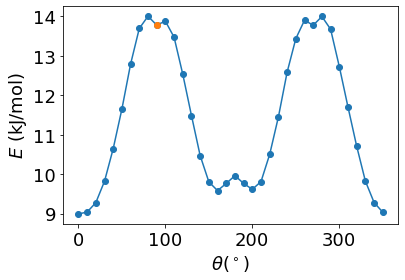

In [64]:
plt.rcParams['font.size'] = 18
plt.plot(np.linspace(0, 360, 37)[:-1], energy, '-o')
plt.plot(np.linspace(0, 360, 37)[9], energy[9], 'o')
plt.xlabel(r'$\theta (^\circ)$')
plt.ylabel(r'$E$ (kJ/mol)')

In [73]:
structure_files = []
with open('/data/sahre/projects/atomic-energies/data/nicotinamide/constraint_opt_UFF/dihe_structures', 'r') as f:
    for line in f:
        structure_files.append(line.strip('\n'))

In [86]:
structure_files[9]

'dihe_90.0.xyz'

In [101]:
view(aio.read(f'/data/sahre/projects/atomic-energies/data/nicotinamide/constraint_opt_UFF/{structure_files[4]}'))

<Popen: returncode: None args: ['/home/sahre/opt/miniconda3/envs/qm-tools/bi...>

# 2-aminobenzaldehyde

In [102]:
import ase.io as aio
from ase.visualize import view
from ase import Atoms

from pyscf import gto, dft

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm

import numpy as np

from matplotlib import pyplot as plt

In [119]:
mol = aio.read('/home/sahre/work/scratch/aminonezaldehyde.xyz')
view(mol)

mol_dihe = mol.copy()
mol_dihe.set_dihedral(1,6,7,8, 90, indices=[7,8,15])
view(mol_dihe)

<Popen: returncode: None args: ['/home/sahre/opt/miniconda3/envs/qm-tools/bi...>

In [110]:
mol.get_dihedral(1,6,7,8)

359.8496265404899

In [106]:
pyatom = uqm.ase2pyscf(mol)

In [114]:
energies = []
dihedrals = np.linspace(0, 360, 37)
for a in np.linspace(0, 360, 37):
        mol_dihe = mol.copy()
        mol_dihe.set_dihedral(1,6,7,8, a, indices=[7,8,15])
        
        aminobenz = gto.Mole()
        aminobenz.atom = uqm.ase2pyscf(mol_dihe)
        aminobenz.basis = '6-31g'
        aminobenz.build()

        mf = dft.RKS(aminobenz)
        mf.kernel()
        energies.append(mf.e_tot)
energies = np.array(energies)

converged SCF energy = -397.383165634204
converged SCF energy = -397.381720842761
converged SCF energy = -397.377705756584
converged SCF energy = -397.371934630974
converged SCF energy = -397.365405788704
converged SCF energy = -397.358965993547
converged SCF energy = -397.353213381846
converged SCF energy = -397.348596643182
converged SCF energy = -397.345495444208
converged SCF energy = -397.344220462812
converged SCF energy = -397.344860372448
converged SCF energy = -397.347163226394
converged SCF energy = -397.350612564141
converged SCF energy = -397.354557053972
converged SCF energy = -397.358358272392
converged SCF energy = -397.361496678268
converged SCF energy = -397.363696760669
converged SCF energy = -397.364923363049
converged SCF energy = -397.365314389871
converged SCF energy = -397.364949809045
converged SCF energy = -397.363739644127
converged SCF energy = -397.361542696647
converged SCF energy = -397.358394992303
converged SCF energy = -397.354575907422
converged SCF en

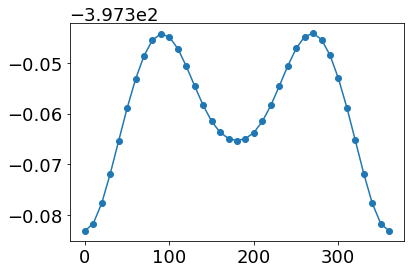

In [117]:
dihedrals = np.linspace(0, 360, 37)

plt.plot(dihedrals, energies, '-o')

In [118]:
energies = np.array(energies)
np.amax(energies)-np.amin(energies)

0.03904098838756909